# CDISCOUNT'S IMAGE CLASSIFICATION CHALLENGE
The competition is held on kaggle :
https://www.kaggle.com/c/cdiscount-image-classification-challenge

The dataset train.bson consists of a ~60 GB file containing 7,069,896 dictionaries, one per product.
The test set contains a list of 1,768,182 products in the same format as train.bson, except there is no category_id included.

Since each product belongs to one and only one category, this is a multi class classification problem : https://en.wikipedia.org/wiki/Multiclass_classification

In [1]:
%matplotlib inline
import mlbox as mlb
import bson  # this is installed with the pymongo package
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.data import imread   # or, whatever image library you prefer
import multiprocessing as mp      # will come in handy due to the size of the data
import io

Using Theano backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
C:\Users\mdarq\AppData\Local\conda\conda\envs\MLBox\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


The code below will decode the BSON file as an iterable. The pictures can be analyzed in the loop, however this solution seems too memory intensive for a desktop computer

In [ ]:
#Open the file and get all the images (along with product and category Ids)
data = bson.decode_file_iter(open('D:/My Documents/0-KAGGLE/CDISCOUNT/train_example.bson', 'rb')) #dict_keys(['_id', 'imgs', 'category_id'])prod_to_category = dict()
prod_to_category = dict()
for c, d in tqdm(enumerate(data)): # d are dictionnaries with keys ("_id", "imgs", "category_id")
    product_id = d['_id']
    #print("Product id", product_id) #For testing purposes : checking the number of pictures for each product
    category_id = d['category_id'] # This won't be in Test data
    for e, pic in enumerate(d['imgs']): #e is the index of each picture in imgs (so number of pictures for a given Id is e+1)
        #print(e) #For testing purposes : checking the number of pictures for each product
        picture = imread(io.BytesIO(pic['picture'])) #The only key in pic is 'picture'
        prod_to_category[c,e] = picture, category_id #Each file lies in a separate dictionnary with an associated category

prod_to_category = pd.DataFrame.from_dict(prod_to_category, orient='index')
prod_to_category.index.name = '_id'
prod_to_category.rename(columns={0: 'pictures'}, inplace=True)
prod_to_category.rename(columns={1: 'category_id'}, inplace=True)

plt.imshow(prod_to_category["pictures"][0])

In [ ]:
print("Il y a {0} images pour {1} produits".format(c,len(prod_to_category)))

## Other strategy

Decode BSON file as above, but use of itertools.islice to get only a fraction of the data

30000it [05:16, 94.92it/s] 


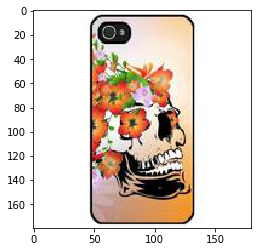

In [21]:
#Open the file and get all the images (along with product and category Ids)
import itertools
data = bson.decode_file_iter(open('D:/My Documents/0-KAGGLE/CDISCOUNT/train.bson', 'rb')) #dict_keys(['_id', 'imgs', 'category_id'])prod_to_category = dict()
pics_category = dict()

for d in tqdm(itertools.islice(data, 0,3000000, 100)): #start/stop/step
    product_id = d['_id']
    category_id = d['category_id'] # This won't be in Test data
    for e, pic in enumerate(d['imgs']): #e is the index of each picture in imgs (so number of pictures for a given Id is e+1)
        #print(e) #For testing purposes : checking the number of pictures for each product
        picture = imread(io.BytesIO(pic['picture'])) #The only key in pic is 'picture'
        pics_category[product_id,e] = picture, category_id #Each file lies in a separate dictionnary with an associated category

pics_category = pd.DataFrame.from_dict(pics_category, orient='index')
pics_category.index.name = '_id (Id, pic number)'
pics_category.rename(columns={0: 'pictures'}, inplace=True)
pics_category.rename(columns={1: 'category_id'}, inplace=True)

plt.imshow(pics_category["pictures"][0])

Each row is a single picture with the associated category id

In [10]:
pics_category.head()

,pictures,category_id
"_id (Id, pic number)",,
"(0, 0)","[[[255, 255, 255], [255, 255, 255], [255, 255,...",1000010653
"(11, 0)","[[[255, 251, 255], [255, 252, 255], [255, 254,...",1000010653
"(25, 0)","[[[255, 255, 255], [255, 255, 255], [255, 255,...",1000010653
"(25, 1)","[[[255, 255, 255], [255, 255, 255], [255, 255,...",1000010653
"(25, 2)","[[[255, 255, 255], [255, 255, 255], [255, 255,...",1000010653


In [22]:
print("J'ai {0} images".format(len(pics_category)))

J'ai 52752 images


In [23]:
pics_category.to_csv("pics_category.csv")

In [24]:
pics_category["category_id"].value_counts()

1000004181    503
1000012989    465
1000010641    462
1000010661    459
1000004141    455
1000004184    452
1000010722    446
1000010110    444
1000010653    443
1000010136    436
1000010667    431
1000012993    425
1000004079    422
1000010538    420
1000004085    417
1000003983    415
1000010108    403
1000014202    402
1000021535    397
1000003787    397
1000010663    395
1000008094    386
1000010061    386
1000011427    378
1000005509    374
1000010100    371
1000010647    367
1000012965    364
1000010170    363
1000011423    356
             ... 
1000003007      1
1000002880      1
1000019433      1
1000017812      1
1000019480      1
1000015514      1
1000005313      1
1000017083      1
1000015034      1
1000012505      1
1000008822      1
1000018669      1
1000002293      1
1000000387      1
1000005992      1
1000014406      1
1000006534      1
1000012281      1
1000012249      1
1000015861      1
1000011993      1
1000003997      1
1000018308      1
1000010104      1
1000012869

In [16]:
A.head(40)

1000004079    276
1000010667    271
1000003787    270
1000021535    266
1000005509    264
1000010110    263
1000010663    260
1000011423    255
1000010641    253
1000004181    249
1000010061    249
1000004184    248
1000010647    245
1000014202    244
1000010722    241
1000010538    239
1000010100    238
1000008094    237
1000004085    237
1000011427    237
1000012993    236
1000003796    236
1000010645    235
1000010170    231
1000010635    231
1000003983    230
1000012965    228
1000010661    228
1000010136    227
1000004141    224
1000010108    223
1000015309    223
1000012989    221
1000010653    216
1000018296    210
1000021533    210
1000001831    209
1000005956    191
1000011349    184
1000010683    179
Name: category_id, dtype: int64